## Project goals:
### 1. Train a classification model that can efficiently predict customer churn
### 2. Identify important features that affect customer churn/retention

## 1. Set up the basics

In [0]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os
import sys
import time
import json
from IPython.display import display
from time import strftime, gmtime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## 2. Import data 

In [56]:
df = pd.read_csv('Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', 100)
df.head(10) # 7043 row x 21 columns

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [57]:
# see column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [59]:
# fot some reason, `TotalCharges` is defined as object data type, so it needs to 
# be converted into float data type 

df['TotalCharges'] = df['TotalCharges'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


**Definition of features (from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn)**
- **`CustomerID`**: Customer ID
- **`Gender`**: Whether the customer is a male or a female
- **`SeniorCitizen`**: Whether the customer is a senior citizen or not (1, 0)
- **`Partner`**: Whether the customer has a partner or not (Yes, No)
- **`Dependents`**: Whether the customer has dependents or not (Yes, No)
- **`Tenure`**: Number of months the customer has stayed with the company
- **`PhoneService`**: Whether the customer has a phone service or not (Yes, No)
- **`MultipleLines`**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **`InternetService`**: Customer’s internet service provider (DSL, Fiber optic, No)
- **`OnlineSecurity`**: Whether the customer has online security or not (Yes, No, No internet service)
- **`OnlineBackup`**: Whether the customer has online backup or not (Yes, No, No internet service)
- **`DeviceProtection`**: Whether the customer has device protection or not (Yes, No, No internet service)
- **`TechSupport`**: Whether the customer has tech support or not (Yes, No, No internet service)
- **`StreamingTV`**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **`StreamingMovies`**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **`Contract`**: The contract term of the customer (Month-to-month, One year, Two year)
- **`PaperlessBilling`**: Whether the customer has paperless billing or not (Yes, No)
- **`PaymentMethod`**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **`MonthlyCharges`**: The amount charged to the customer monthly
- **`TotalCharges`**: The total amount charged to the customer
- **`Churn`**: Whether the customer churned or not (Yes or No)

## 3. data exploration  & visualization

### 3.1 check missing values

In [60]:
# check duplicate data 
df = df.drop_duplicates()
df.shape # (7043, 21), no duplicate rows

(7043, 21)

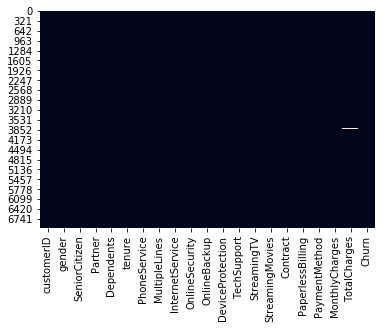

In [61]:
# check missing values via heatmap
sns.heatmap(df.isnull(), cbar=False) #  data viz shows there are a few missing values in `TotalCharges` column 

In [62]:
# verify via numeric summary
df.isnull().sum() # 11 missing values in the `TotalCharges` column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [63]:
# remove missing values from dataset
df.dropna(inplace=True)
df.shape 

(7032, 21)

### 3.2 Compare cutomer churn between genders

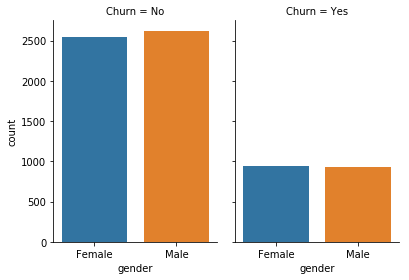

In [64]:
g = sns.catplot(x="gender", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

# no significant difference between genders with regard to churns

### 3.3  Check the relation between having a partner & churn 

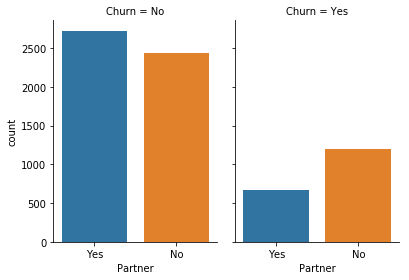

In [65]:
g = sns.catplot(x="Partner", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

# There different patterns in the churn and not churn group. The plot shows that not having 
# a partner may tend to lead to a churn


### 3.4  Check the relation between having dependents & churn 

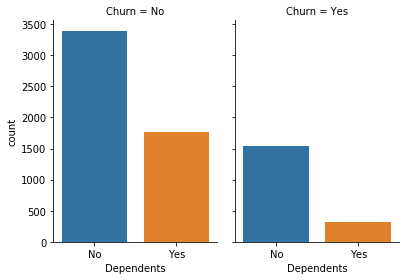

In [66]:
g = sns.catplot(x="Dependents", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

# The pattern in the chrun and no churn group is similar; Therefore having dependents may not be a 
# effective feature

### 3.5 Check the relation between using phone service & churn

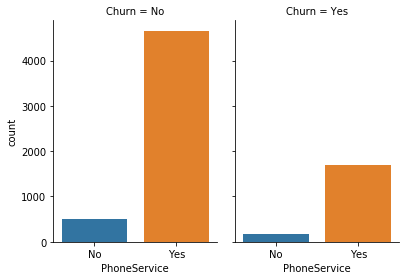

In [67]:
g = sns.catplot(x="PhoneService", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

# Once again, the pattern is similar between the two groups, suggesting having phone service 
# may not be an effective feature. Churn or no churn, there are just more people subscribing to 
# phone service

### 3.6 Check use multiple lines & churn

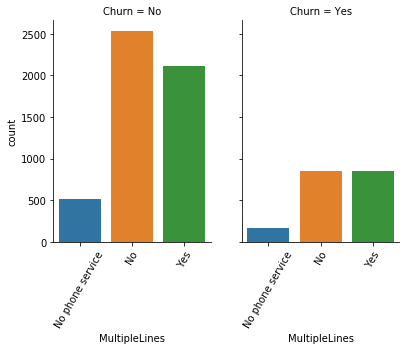

In [68]:
g = sns.catplot(x="MultipleLines", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=60)

# No significant difference though using multiple lines seems to yield more no churn

### 3.7 Check use fiber optic & churn

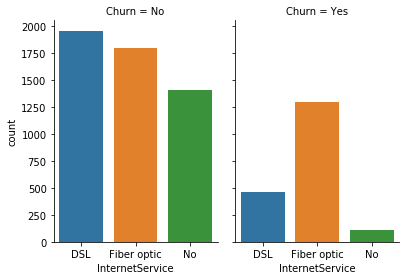

In [69]:
g = sns.catplot(x="InternetService", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

# it is obvious that use of fiber optic leads to higher churn compared to DSL

### 3.8 Check use of internet online security & churn

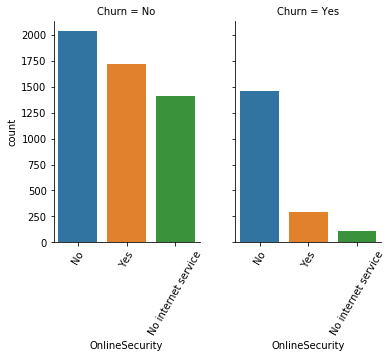

In [70]:
g = sns.catplot(x="OnlineSecurity", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=60)

# No significant difference

### 3.9 Check use of online backup service & churn

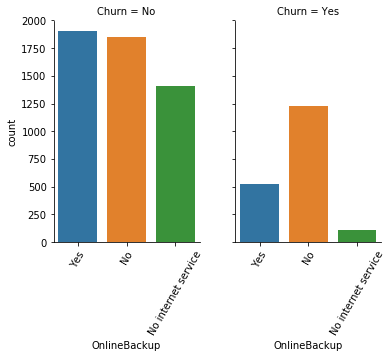

In [71]:
g = sns.catplot(x="OnlineBackup", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=60)

# it seems not use online backup yields higher churn. However, not using it does not lead to 
# prticularly higher retenton either. This may suggest that some specific users encountered some problem
# when not using this service

### 3.10 Check the use of device protection & churn

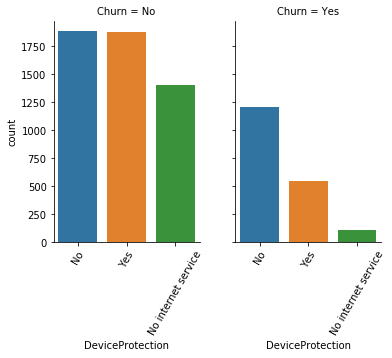

In [72]:
g = sns.catplot(x="DeviceProtection", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=60)

# while use and not use this service lead to similar no churn, not using this service 
# seems to lead higher churn

### 3.11 Check use of tech support & churn 

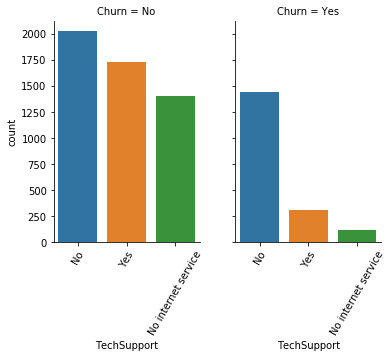

In [73]:
g = sns.catplot(x="TechSupport", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=60)

# the pattern across three sub-groups is consistant, it shows that users may have a mixed 
# experience of using this service as use this service also doesn't lead to more no churn

### 3.12 Check use of streaming TC service & churn

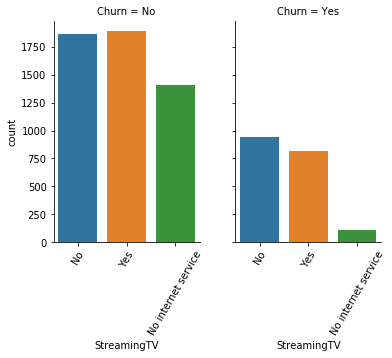

In [74]:
g = sns.catplot(x="StreamingTV", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

g.set_xticklabels(rotation=60)

# not use streaming TV service may lead to higher churn 

### 3.13 Check the use of streaming movies & churn 

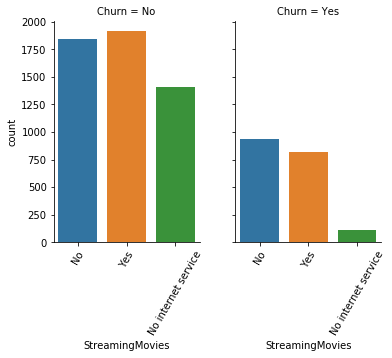

In [75]:
g = sns.catplot(x="StreamingMovies", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=60)

# not using streaming movies may lead to higher churn

### 3.14 Relation between contract length & churn 

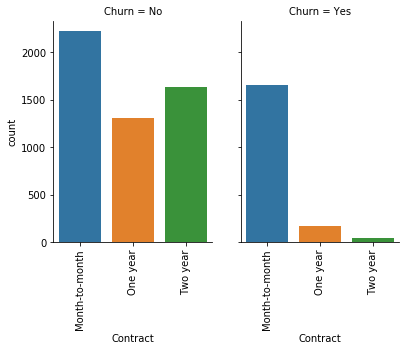

In [76]:
g = sns.catplot(x="Contract", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)

g.set_xticklabels(rotation=90)

# Comparatively, 2-year contract yields lowest churn, while monthly contract has a mixed result of high 
# churn and no churn. This may just reflects that nature of monthly contract users, who tend to drop the 
# service faster since they may just be using the service temporarily

### 3.15 Use of paperless bills & churn 

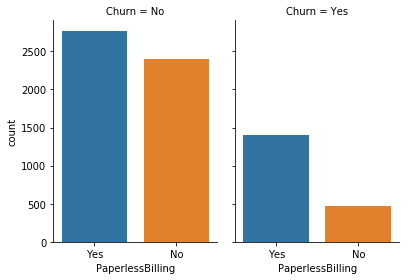

In [77]:
g = sns.catplot(x="PaperlessBilling", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

# no significant effect of using paperless bills

### 3.16 Payment method & churn 

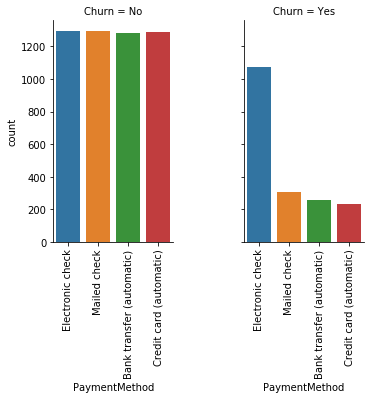

In [78]:
g = sns.catplot(x="PaymentMethod", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7)
g.set_xticklabels(rotation=90)

# It looks like eletronic check is not in favor of customer retention, while other
# payment methods are don't particularly lead to high churn

### 3.17 Check the relaton between senior customer with churn

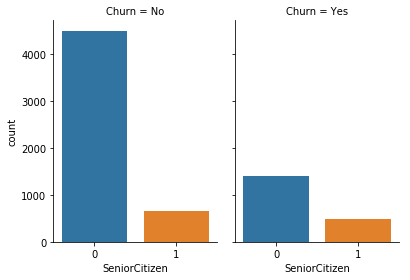

In [79]:
# recode column variable
mapping = {0: 'not senior', 1: 'senior'}
df.replace({'SeniorCitizen': mapping})

g = sns.catplot(x="SeniorCitizen", col="Churn",
                data=df, kind="count", 
                 height=4, aspect=.7);

# senior user account for the minority of users, and there is no significant effect
# on the churn


### 3.18 Check relaton between continuous features & churn 

In [0]:
# subset dataframe to get continuous features
df_cont = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# recode `Churn` column 
mapping = {'No': 0, 'Yes': 1}
df_cont = df_cont.replace({'Churn': mapping})

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


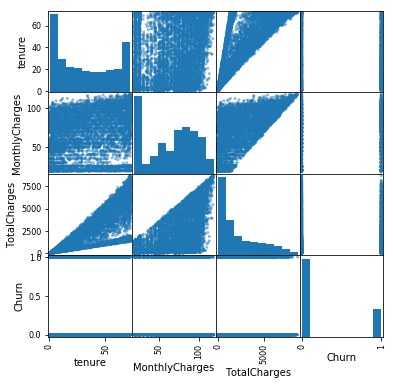

In [81]:
display(df.corr())
pd.plotting.scatter_matrix(df_cont, figsize=(6, 6))
plt.show()


### Data distribution summry:
-  Tenure: there is an concentration in the head and tail. While the a large number of short-tenure users make intuitive sense, it is worth checking if there is abnormal outliers among the long-tenure users
- Monthly Charges' distribution makes sense
- In general, there churn is about half the number of no churn

### Data correlaton:
- The only obvious correlation is between tenure and total charge. This makes intuitive sense as the longer you stay in the company's service, the more in total you spend. What's of note is that monthly charge and total charge are modestly correlated (r=.65). This suggests that for long tenture customers, their monthly payment may not be high although it is possible.

### 3.19  Check outliers (continuous features) 

In [82]:
# Compare mean, median, and max values to examine outliers
df_cont.loc[:, df_cont.columns != 'Churn'].describe()
# summary: For both continuous features, no upper bound outliers are detected (no big gap 
# between their mean and median, nor are their the max values too abnormal)


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Quick summary:
*  Most of the features are categorical
* 11 missing values in the TotalCharges column
*  Features that potentially impact churn include:
    * having a partner
    * use of fiber optic 
    * online backup 
    * device protection 
    * streaming TV service 
    * streaming movie service
*  Month charges correlates with total charges, so does tenure with total charges
*  No dramatic outliers in the continuous variables


### 4. Predict churn with various models

In [83]:
# recode and reshape dataframe for modeling

# recode the `SeniorCitizen` column
mapping = {0: 'No', 1: 'Yes'}
df = df.replace({'SeniorCitizen': mapping})
df.columns = df.columns.str.capitalize()
df.dtypes 

Customerid           object
Gender               object
Seniorcitizen        object
Partner              object
Dependents           object
Tenure                int64
Phoneservice         object
Multiplelines        object
Internetservice      object
Onlinesecurity       object
Onlinebackup         object
Deviceprotection     object
Techsupport          object
Streamingtv          object
Streamingmovies      object
Contract             object
Paperlessbilling     object
Paymentmethod        object
Monthlycharges      float64
Totalcharges        float64
Churn                object
dtype: object

### 4.1 Split data into train, validaton, test (60%, 20%,  20%)

In [0]:
y = df.pop('Churn').to_frame()
X = df

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.4, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, stratify=y_test, test_size=0.5, random_state=1)
# X_train.shape (4225, 19); X_val.shape (1409, 19); X_test.shape(1409, 19)

In [0]:
# also, recode y (target feature) into numeric binary values
mapping = {'No': 0, 'Yes': 1}
y_train = y_train.replace({'Churn': mapping})
y_val = y_val.replace({'Churn': mapping})
y_test = y_test.replace({'Churn': mapping})

In [87]:
y_train['Churn'].value_counts() 

0    3098
1    1121
Name: Churn, dtype: int64

In [0]:
y_val['Churn'].value_counts()

In [88]:
y_test['Churn'].value_counts() 

0    1032
1     374
Name: Churn, dtype: int64

**Ratio of the churn v.s no churn is verified across train, validaton, test set (about 1:3)**

### 4.2 Logistic regression

In [0]:
# change X_ dataframe to fit logistic regression
dummies_col = ['Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
       'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
       'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod']
dummies = pd.get_dummies(X_train[dummies_col])
X_train_logit = X_train[['Tenure', 'Monthlycharges', 'Totalcharges']].join(dummies)

dummies2 = pd.get_dummies(X_val[dummies_col])
X_val_logit = X_val[['Tenure', 'Monthlycharges', 'Totalcharges']].join(dummies2)

dummies3 = pd.get_dummies(X_test[dummies_col])
X_test_logit = X_test[['Tenure', 'Monthlycharges', 'Totalcharges']].join(dummies3)

In [0]:
# scale continuous features for test, validate, and test data 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_logit[['Tenure', 'Monthlycharges', 'Totalcharges']] = scaler.fit_transform(X_train_logit[['Tenure', 'Monthlycharges', 'Totalcharges']])

X_val_logit[['Tenure', 'Monthlycharges', 'Totalcharges']] = scaler.fit_transform(X_val_logit[['Tenure', 'Monthlycharges', 'Totalcharges']])

X_test_logit[['Tenure', 'Monthlycharges', 'Totalcharges']] = scaler.fit_transform(X_test_logit[['Tenure', 'Monthlycharges', 'Totalcharges']])



In [113]:
# fit 1st logistic model and check accuracy

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

Logistic_model = LogisticRegressionCV(solver='lbfgs', cv=10, random_state=1)
Logistic_model.fit(X_train_logit, y_train)
predict_val = Logistic_model.predict(X_val_logit)
accuracy_val = accuracy_score(y_val,predict_val)
print('accuracy_score on validation dataset : ', accuracy_val)

# 0.80 accuracy rate

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score on validation dataset :  0.7981520966595593


In [114]:
# fit 2nd logistic model by using SMOTE upsampling, recursive feature elimination (RFE) to improve accuracy

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train_logit.columns
os_data_X,os_data_y = os.fit_sample(X_train_logit, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X)) #6196, compared to original 4225 in original 6196
print("Number of NOT churn in oversampled data: ",len(os_data_y[os_data_y['Churn']==0])) #3098
print("Number of churn in oversampled data: ",len(os_data_y[os_data_y['Churn']==1])) #3098
print("Proportion of NOT churn in oversampled data: ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X)) #0.5
print("Proportion of churn in oversampled data: ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X)) #0.5

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  6196
Number of NOT churn in oversampled data:  3098
Number of churn in oversampled data:  3098
Proportion of NOT churn in oversampled data:  0.5
Proportion of churn in oversampled data:  0.5


In [0]:
# use recursive feature elimination (RFE) filter in most useful features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Logistic_model2 = LogisticRegressionCV(solver='lbfgs', cv=10, random_state=1)
rfe = RFE(Logistic_model2, 10) # note: the designation of 10 features is an arbitrary choice 
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [116]:
# get selected column indexes

index = [True, False, True, False, False, False, False, False, False, False, False, False,
  True, False, False, False, False, True, False, True, False, False, True, False,
 False, False, False, False, False, False, False, False, False, False, False, False,
 False, True, False, True, False, True, False, False, True, False]

select_col = []
for i in range(len(index)):
  if index[i] == True:
    select_col.append(i)
    
print(select_col) # index for selected columns after RFE

[0, 2, 12, 17, 19, 22, 37, 39, 41, 44]


In [117]:
# fit 2nd logistic model and check accuracy on validaton set
X_train_logit_rfe = os_data_X.iloc[:, select_col]
y_train_rfe = os_data_y['Churn']

Logistic_model2 = LogisticRegressionCV(solver='lbfgs', cv=10, random_state=1)
Logistic_model2.fit(X_train_logit_rfe, y_train_rfe)

# filter columns for X_val set (from original 46 features to 10 features, same as X_train )
X_val_logit_rfe = X_val_logit.iloc[:, select_col]
predict_val = Logistic_model2.predict(X_val_logit_rfe)
accuracy_val = accuracy_score(y_val,predict_val)
print("logistic regression model2's accuracy score on validation dataset: ", accuracy_val)

# 0.73 accuracy (model was able to converge, but using upsampling and RFE results in worse accuracy)

logistic regression model2's accuracy score on validation dataset:  0.7341862117981521


### Quick summary:
- After applying upsampling to address imbalanced data, and recursive feature elimination (RFE)
to auto-select useful features, the overall accuracy for logistic regression model has not improved. (.73) 
- However, the benefits of applying the two techniques did lead the model to converge, and the features selected 
with RFE mostly correspond to the findings from previous data visualizaton and exploration 

### 4.3 XGBoost

In [123]:
import xgboost as xgb
from xgboost import XGBClassifier


# recycle dataframe from logistic regression to fit XGBoos
X_train_XGB = X_train_logit
X_val_XGB = X_val_logit
X_test_XGB = X_test_logit

# fit the model with the training data
XGB_model = XGBClassifier()
XGB_model.fit(X_train_XGB,y_train)


# predict the target on the validation dataset
predict_val = XGB_model.predict(X_val_XGB)
accuracy_val = accuracy_score(y_val,predict_val)
print("XGBoost model accuracy score on validation dataset: ", accuracy_val)

# 0.81 initial accuracy without tuning parameters (slightly better than logistic regression)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost model accuracy score on validation dataset:  0.8052594171997157


### 4.3.1 Setting initial parameters before tuning XGBoost

In [0]:
# use a ad-hoc functon to wrap this tuning process (reference: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)


def XGBmodelfit(alg, dtrain, y, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y['Churn'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y['Churn'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y['Churn'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [0]:
# set up initial parameters to be tuned

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=1234)

features = [f for f in X_train_XGB.columns]



Model Report
Accuracy : 0.8282
AUC Score (Train): 0.893730


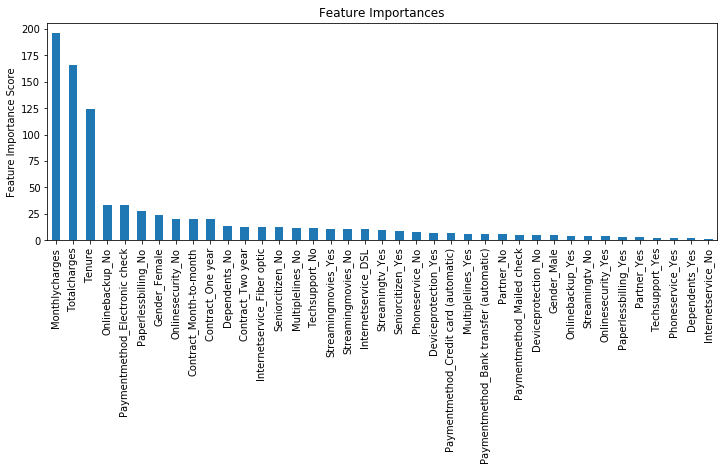

In [126]:
# fit XGBoost modle initial random parameter as baseline
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV  
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


XGBmodelfit(xgb1, X_train_XGB, y_train, features)

# accuracy has improve to .83(from .81); auc= .89
# monthly payment, total charges, and tenure are the most import features

### 4.3.2 Tune max_depth and min_child_weight

In [127]:
# begin with an arbitrary parameters for max_depth and min_child_weight

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train_XGB,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


# max_depth =3, min_child_weight = 3, new accuracy score after tuning = .84 (improved from .83)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([2.18289275, 1.74039454, 1.90554466, 2.83292723, 2.86836548,
         2.91588955, 4.02667007, 3.95610332, 3.78503451, 5.49166646,
         4.77933545, 4.25422211]),
  'mean_score_time': array([0.02641649, 0.03318114, 0.04039259, 0.04331594, 0.03871427,
         0.03111467, 0.04161019, 0.03695216, 0.03756962, 0.06081295,
         0.04062958, 0.03426504]),
  'mean_test_score': array([0.84173114, 0.84238274, 0.84231989, 0.83066156, 0.83340849,
         0.83296342, 0.82564974, 0.83004926, 0.82909328, 0.82073691,
         0.82409796, 0.82648721]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
       

In [129]:
# validate max_depth and min_child_weight with a range of optimal parameters

param_test2 = {
 'max_depth':range(2,3,4),
 'min_child_weight':range(2,3,4)
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train_XGB,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

# max_depth =2, min_child_weight = 2, new accuracy score after tuning = .85 (improved from .84)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.45365591]),
  'mean_score_time': array([0.02585702]),
  'mean_test_score': array([0.84572545]),
  'param_max_depth': masked_array(data=[2],
               mask=[False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[2],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2, 'min_child_weight': 2}],
  'rank_test_score': array([1], dtype=int32),
  'split0_test_score': array([0.85452688]),
  'split1_test_score': array([0.82039891]),
  'split2_test_score': array([0.82353471]),
  'split3_test_score': array([0.85762967]),
  'split4_test_score': array([0.87253707]),
  'std_fit_time': array([0.41442045]),
  'std_score_time': array([0.01400621]),
  'std_test_score': array([0.02035633])},
 {'max_depth': 2, 'min_child_weight': 2},
 0.8457254474134487)

In [130]:
# validate max_depth and min_child_weight again with varing values 

param_test3 = {
 'max_depth':range(1,2,3),
 'min_child_weight':range(1,2,3)
}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch3.fit(X_train_XGB,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

# max_depth =1, min_child_weight = 1 show slightly better accuracy = .847 (compared to .845)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.18434792]),
  'mean_score_time': array([0.01564384]),
  'mean_test_score': array([0.84718001]),
  'param_max_depth': masked_array(data=[1],
               mask=[False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 1, 'min_child_weight': 1}],
  'rank_test_score': array([1], dtype=int32),
  'split0_test_score': array([0.85589247]),
  'split1_test_score': array([0.82833741]),
  'split2_test_score': array([0.82642209]),
  'split3_test_score': array([0.85723301]),
  'split4_test_score': array([0.86801509]),
  'std_fit_time': array([0.36045099]),
  'std_score_time': array([0.0060302]),
  'std_test_score': array([0.01671529])},
 {'max_depth': 1, 'min_child_weight': 1},
 0.847180014746792)

In [134]:
param_test4 = {
 'max_depth':range(1,2,3),
 'min_child_weight':range(1,2,3)
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(X_train_XGB,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

# result shows max_depth = 1, min_child_weight = 1 is still a better setting with accuracy = .85)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.13394966]),
  'mean_score_time': array([0.01745157]),
  'mean_test_score': array([0.84718001]),
  'param_max_depth': masked_array(data=[1],
               mask=[False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 1, 'min_child_weight': 1}],
  'rank_test_score': array([1], dtype=int32),
  'split0_test_score': array([0.85589247]),
  'split1_test_score': array([0.82833741]),
  'split2_test_score': array([0.82642209]),
  'split3_test_score': array([0.85723301]),
  'split4_test_score': array([0.86801509]),
  'std_fit_time': array([0.32945238]),
  'std_score_time': array([0.01139508]),
  'std_test_score': array([0.01671529])},
 {'max_depth': 1, 'min_child_weight': 1},
 0.847180014746792)

### 4.3.3 Tune gamma

In [132]:
param_test5 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(X_train_XGB,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

# gamma = .4 yields the best accuracy, though it does not help with accuracy rate significantly

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.7114151 , 1.27931528, 1.40987024, 1.37023354, 1.25835176]),
  'mean_score_time': array([0.03152437, 0.02952905, 0.01946454, 0.02833223, 0.01476855]),
  'mean_test_score': array([0.84572545, 0.84591456, 0.8458411 , 0.84586769, 0.84595366]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([5, 2, 4, 3, 1], dtype=int32),
  'split0_test_score': array([0.85452688, 0.85438351, 0.85438351, 0.85443728, 0.85495341]),
  'split1_test_score': array([0.82039891, 0.82046371, 0.82042771, 0.82042771, 0.82042771]),
  'split2_test_score': array([0.82353471, 0.82353471, 0.82323229, 0.82333309, 0.82318188]),
  'split3_test_score': array([0.85762967, 0.85860331, 0.85857446, 0.85857446, 0.85860331]),
  'split4_test_score': arra

### 4.3.4 Tune subsample and colsample_bytree

In [135]:
param_test6 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=2, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(X_train_XGB,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

# subsample=0.8, colsample_bytree=0.8 remains optimal parameters without significant improvement in accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.70482664, 1.34245181, 1.38707614, 1.35925674, 1.37955589,
         1.3365149 , 1.42921252, 1.49976482, 1.30950222]),
  'mean_score_time': array([0.03096929, 0.02765951, 0.02874532, 0.04073567, 0.03277788,
         0.02655964, 0.02630086, 0.02674456, 0.01685658]),
  'mean_test_score': array([0.84548498, 0.84554129, 0.8452886 , 0.84540653, 0.84595366,
         0.84533825, 0.8453431 , 0.84506548, 0.8450165 ]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.75, 'subsample

### 4.3.5 Tune regularization parameters

In [136]:
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=2,
 min_child_weight=2, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(X_train_XGB,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

# reg_alpha= 1 is the optimal setting, but no significant improvement in accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


({'mean_fit_time': array([1.73576145, 1.31683517, 1.35421877, 1.39316387, 1.11504192]),
  'mean_score_time': array([0.04115415, 0.03678226, 0.04308209, 0.02826719, 0.01561694]),
  'mean_test_score': array([0.84595366, 0.8461743 , 0.84542095, 0.84623711, 0.8348999 ]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'rank_test_score': array([3, 2, 4, 1, 5], dtype=int32),
  'split0_test_score': array([0.85495341, 0.85467742, 0.85392473, 0.85539785, 0.84374194]),
  'split1_test_score': array([0.82042771, 0.82049251, 0.82146457, 0.82255184, 0.82236823]),
  'split2_test_score': array([0.82318188, 0.82429435, 0.82296227, 0.82377952, 0.82040251]),
  'split3_test_score': array([0.85860331, 0.85881967, 0.85845906, 0.85829319, 0.83554264]),
 

### 4.3.6 Conclude tuned parameters with more trees & lower learning rate


Model Report
Accuracy : 0.8061
AUC Score (Train): 0.854469


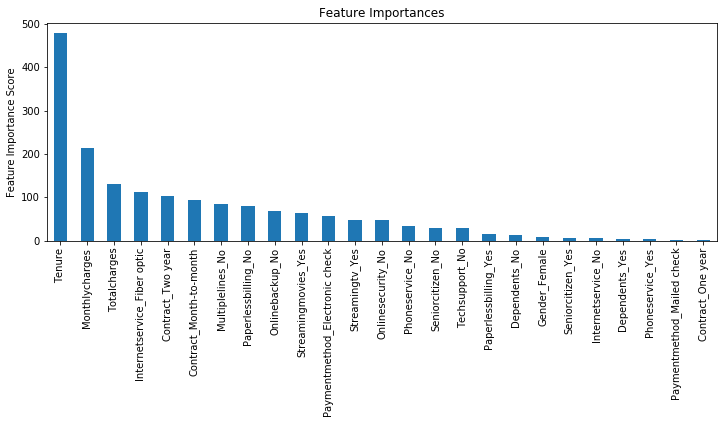

In [137]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=1,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# fit XGBoost model again with optimized parameters
XGBmodelfit(xgb2, X_train_XGB, y_train, features)

# accuracy .81, auc .86 (compared to xgb1(before tuning).83(from .81); auc= .89)
# result shows that optimized parameters do not yield better result 



### 4.4 Fit xgb1 and xgb2 (parameters tuned) on validation data


Model Report
Accuracy : 0.8692
AUC Score (Train): 0.933894


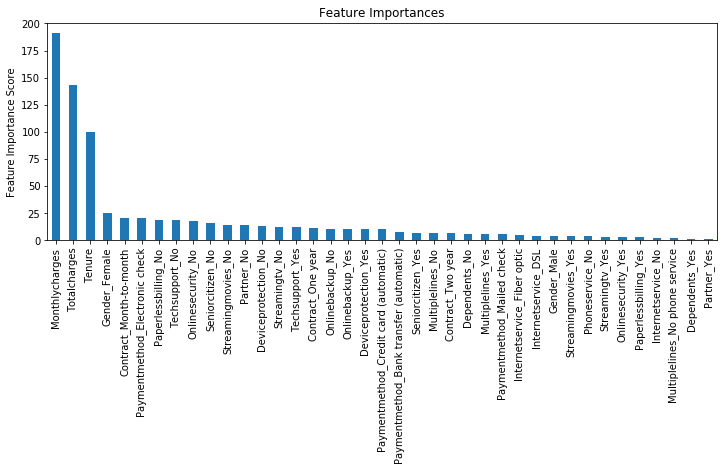

In [138]:
XGBmodelfit(xgb1, X_val_XGB, y_val, features)
# accuracy: .87, auc .93


Model Report
Accuracy : 0.7918
AUC Score (Train): 0.840804


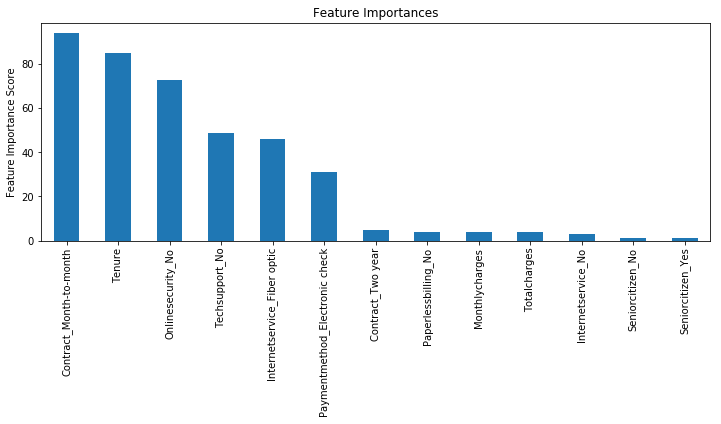

In [139]:
XGBmodelfit(xgb2, X_val_XGB, y_val, features)
# accuracy: .79, auc .84

### Summary: 
  - Tunned parameters actually tields a worse accuracy result on the validation set
  - This suggests that tuning process is perhaps subject to overfitting the train data
  - However, the optimized with tuned parameters also exhibits a satisfactory performance, and it also gives good insights in important features other than just payment amount regarding churn prediction. For instance, **monthly contract, use of online security**, and **tech support** can be valuable information to take business action on to prevent churn 
  - To examine the robustness of current **xgb1** model, we can see its perfomance on another hold-out test set and compared to the tuned model **xgb2**

### Predict on completely hold-out test set

In [140]:
X_test.shape # 1406 data points in this hold-out test set

(1406, 20)


Model Report
Accuracy : 0.8798
AUC Score (Train): 0.943510


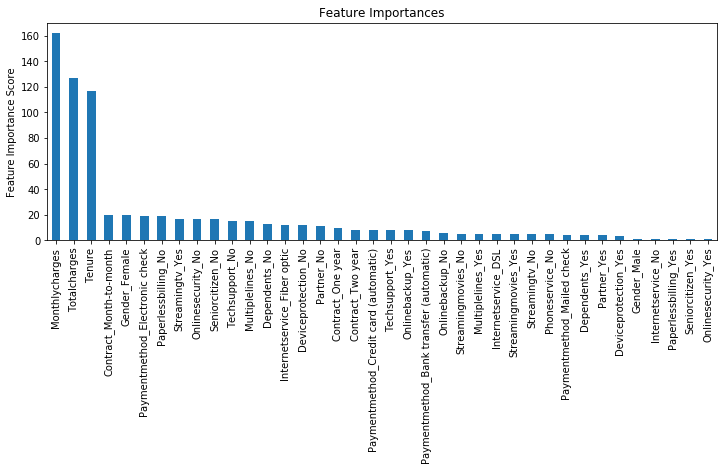

In [141]:
XGBmodelfit(xgb1, X_test_XGB, y_test, features)
# accuracy: .88, auc .94
# xgb1 model performance show stability and robustness 


Model Report
Accuracy : 0.8115
AUC Score (Train): 0.858284


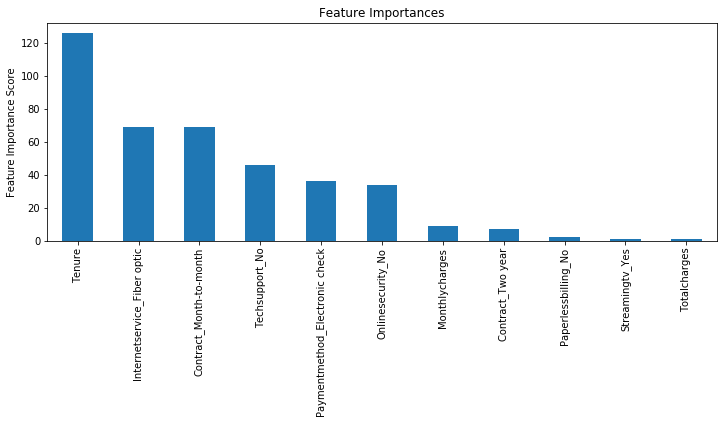

In [142]:
XGBmodelfit(xgb2, X_test_XGB, y_test, features)

# although general performance of this tuned xgb2 model is not as good as xgb1, the result shows that monthly charge,
# month-to-month contract, and use of tech support remain as important predictive features across dataset for customer churn

### 5. Final Summary

- Important features regarding predicting customer churn include: tenure, month charge, use of monthly contract, fiber optic, and tech support (useful reference for marketing and CRM) 
- XGBoost performs better than logistic regression on predicting customer churn in this current dataset
- Setup of optimal parameters is as follows:


---




```
# optimal parameters beow:

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)
```



## END OF THIS PROJECT NOTEBOOK